In [1]:
#import all the important libraries required for developing the model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf

In [2]:
#reading the dataset with the help of pandas library.
a = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv')

In [3]:
#displaying first five rows of the dataframe using the head command
a.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Other information of the dataset
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
#Removing the unecessary columns from the dataset
a.drop(labels = {'Unnamed: 0'},axis = 1, inplace = True)

In [6]:
#info of the dataset after removing the column from dataset
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


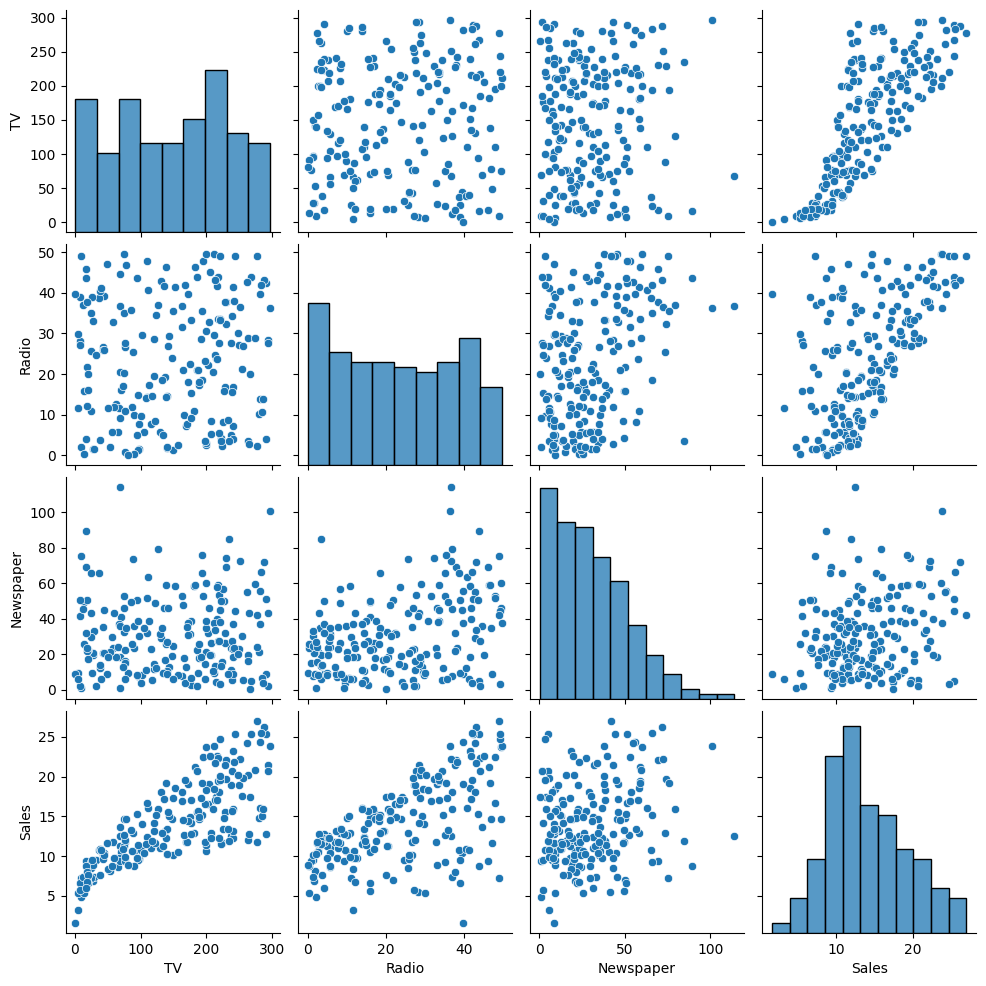

In [7]:
#scatterplot of the dataset
sns.pairplot(a)

<Axes: >

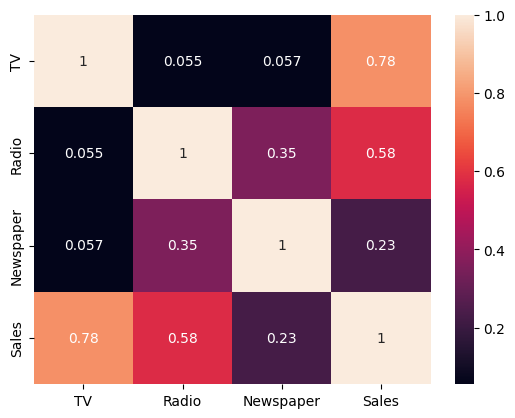

In [8]:
#correlation heatmap of the dataset
sns.heatmap(a.corr(), annot = True)

In [9]:
#displaying the columns of the dataset
a.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
#selecting the features
selected_features = ['TV', 'Radio', 'Newspaper']

In [11]:
#storing the selected features in the X variable and making it as the predictor variable and y as the target variable
X = a[selected_features]
y = a[['Sales']]

In [12]:
#normalization using MinMaxScaler
#displaying the shape of the normalised variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
print(X_scaled.shape)
print(y_scaled.shape)

(200, 3)
(200, 1)


In [13]:
#splitting the dataset into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = 0.2)

In [14]:
#shape of training and testing dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


In [15]:
#fitting of training values into the model and calculation of training and testing accuracy of the model
model1 = LinearRegression()
model1.fit(X_train,y_train)
print("Training Score",model1.score(X_test,y_test)*100)
print("Testing Score",model1.score(X_test,y_test)*100)

Training Score 92.63043636237688
Testing Score 92.63043636237688


In [16]:
#Artificial Neural Network model
predictor_model = tf.keras.models.Sequential()
predictor_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (3,)))
predictor_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
predictor_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
predictor_model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [17]:
#Summary of the ANN model
predictor_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20701 (80.86 KB)
Trainable params: 20701 (80.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#Compiling the Ann model
predictor_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [19]:
#Calculating the epochs of the model
epochs_hist = predictor_model.fit(X_scaled,y_scaled,epochs = 50, validation_split = 0.33,batch_size = 125)

Epoch 1/50
2/2 [==============================] - 1s 148ms/step - loss: 0.3354 - val_loss: 0.1908
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 0.2024 - val_loss: 0.0994
Epoch 3/50
2/2 [==============================] - 0s 25ms/step - loss: 0.1050 - val_loss: 0.0407
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0440 - val_loss: 0.0143
Epoch 5/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0163 - val_loss: 0.0160
Epoch 6/50
2/2 [==============================] - 0s 30ms/step - loss: 0.0211 - val_loss: 0.0306
Epoch 7/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0373 - val_loss: 0.0356
Epoch 8/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0423 - val_loss: 0.0295
Epoch 9/50
2/2 [==============================] - 0s 22ms/step - loss: 0.0350 - val_loss: 0.0194
Epoch 10/50
2/2 [==============================] - 0s 23ms/step - loss: 0.0240 - val_loss: 0.0115
Epoch 11/50
2/2 [===========

In [20]:
#Finding the keys of the model
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'loss and validation loss')

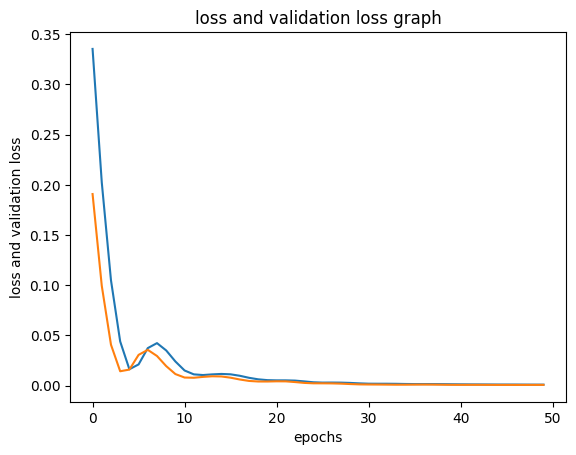

In [21]:
#Constructing the loss and validation loss vs epochs graphs of the model
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['val_loss']
plt.plot(eh)
plt.plot(eh2)
plt.title('loss and validation loss graph')
plt.xlabel('epochs')
plt.ylabel('loss and validation loss')

In [22]:
# Model predicting the values
y_predict = predictor_model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [23]:
#Predicted values
y_predict

array([[0.6251835 ],
       [0.47157365],
       [0.29687148],
       [0.8696865 ],
       [0.8008574 ],
       [0.45526993],
       [0.5422217 ],
       [0.31566322],
       [0.38342333],
       [0.31039774],
       [0.5492274 ],
       [0.31931782],
       [0.32204902],
       [0.6291511 ],
       [0.3540411 ],
       [0.7227275 ],
       [0.5327396 ],
       [0.20521286],
       [0.25997275],
       [0.32687712],
       [0.2965747 ],
       [0.56318814],
       [0.8025256 ],
       [0.5159098 ],
       [0.24789034],
       [0.5282853 ],
       [0.6646498 ],
       [0.68518555],
       [0.2874819 ],
       [0.9050667 ],
       [0.39379287],
       [0.46678865],
       [0.37927645],
       [0.20352603],
       [0.43376964],
       [0.20535688],
       [0.61167866],
       [0.90136683],
       [0.25527   ],
       [0.7055037 ]], dtype=float32)

Text(0, 0.5, 'y_predict')

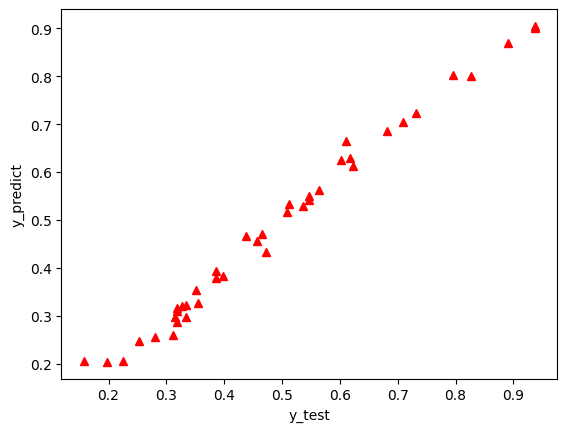

In [31]:
#graph between y_test and y_predict.
plt.plot(y_test,y_predict, '^', color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_predict')

Text(0, 0.5, 'true_values')

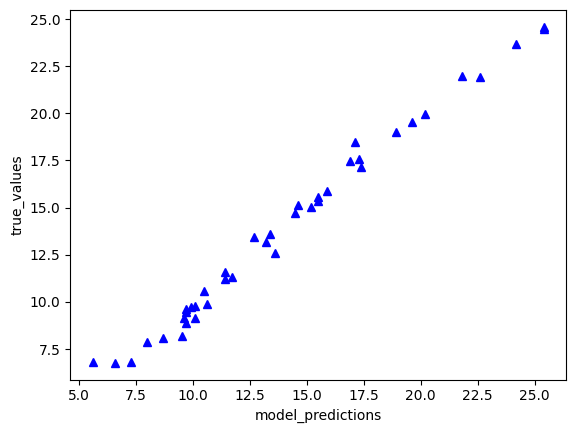

In [25]:
#graph between y_test_original and y_predict_original.
y_predict_original = scaler.inverse_transform(y_predict)
y_test_original = scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original,'^',color = 'b')
plt.xlabel('model_predictions')
plt.ylabel('true_values')

In [26]:
#calculating the value of n
k = X_test.shape
k
n = len(X_test)
print('value of n:',n)

value of n: 40


In [27]:
#calculation of Root Mean Squared Error
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original,y_predict_original)), '0.3f'))
print("Root Mean Squared Error: ",RMSE)

Root Mean Squared Error:  0.572


In [28]:
#calculation of Mean Squared Error
MSE = mean_squared_error(y_test_original,y_predict_original)
print("MeanSquared Error: ",MSE)

MeanSquared Error:  0.32748044255408126


In [29]:
#calculation of R2 score
MAE = mean_absolute_error(y_test_original,y_predict_original)
print(MAE)
r2 = r2_score(y_test_original,y_predict_original)
print("r2 Score of the model is: ",r2)

0.4373806262016293
r2 Score of the model is:  0.987703209370373
